In [47]:
# So, now solve the initial k iterations of the grid by forward check and rest by backtracking

def print_sudoku(grid):
    for row in grid:
        print(" ".join(str(num) if num != 0 else '.' for num in row))

def is_valid(grid, row, col, num):
    for x in range(9):
        if grid[row][x] == num or grid[x][col] == num:
            return False
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(3):
        for j in range(3):
            if grid[start_row + i][start_col + j] == num:
                return False
    return True

def get_constraints(grid):
    constraints = {}
    for row in range(9):
        for col in range(9):
            if grid[row][col] == 0:
                allowed_values = set(range(1, 10))
                for x in range(9):
                    if grid[row][x] in allowed_values:
                        allowed_values.remove(grid[row][x])
                    if grid[x][col] in allowed_values:
                        allowed_values.remove(grid[x][col])
                start_row, start_col = 3 * (row // 3), 3 * (col // 3)
                for i in range(3):
                    for j in range(3):
                        if grid[start_row + i][start_col + j] in allowed_values:
                            allowed_values.remove(grid[start_row + i][start_col + j])
                constraints[(row, col)] = allowed_values
    return constraints

def forward_checking(grid, constraints, iterations):
    def assign_value(row, col, num):
        grid[row][col] = num
        for x in range(9):
            if (row, x) in constraints:
                constraints[(row, x)].discard(num)
            if (x, col) in constraints:
                constraints[(x, col)].discard(num)
        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(3):
            for j in range(3):
                if (start_row + i, start_col + j) in constraints:
                    constraints[(start_row + i, start_col + j)].discard(num)

    for _ in range(iterations):
        if not constraints:
            break
        min_cell = min(constraints, key=lambda k: len(constraints[k]))
        if len(constraints[min_cell]) == 0:
            break
        num = constraints[min_cell].pop()
        # print(f"Assigning {num} to cell {min_cell} with {len(constraints[min_cell])} remaining values")
        assign_value(min_cell[0], min_cell[1], num)
        del constraints[min_cell]

    return grid

# Create a fn that solves sudoku by backtracking
def backtracking(sudoku_grid):
    def solve_sudoku(grid):
        for row in range(9):
            for col in range(9):
                if grid[row][col] == 0:
                    for num in range(1, 10):
                        if is_valid(grid, row, col, num):
                            grid[row][col] = num
                            if solve_sudoku(grid):
                                return True
                            grid[row][col] = 0
                    return False
        return True

    solve_sudoku(sudoku_grid)
    
    return sudoku_grid


In [48]:
import time

sudoku_grid = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

# Running for 10 iterations of forward checking and rest by backtracking and measuring time
start_time = time.time_ns()
constraints = get_constraints(sudoku_grid)
sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
print_sudoku(sudoku_grid)
sudoku_grid = backtracking(sudoku_grid)
print_sudoku(sudoku_grid)
end_time = time.time_ns()

print("Time taken:", (end_time - start_time)/1e6, "ms")


5 3 . . 7 . . . .
6 . . 1 9 5 . . .
. 9 8 . 4 2 . 6 .
8 . . 7 6 . . . 3
4 2 6 8 5 3 7 9 1
7 . . 9 2 . . . 6
. 6 . . 3 . 2 8 .
. . . 4 1 9 . . 5
. . . . 8 . . 7 9
5 3 4 6 7 8 9 1 2
6 7 2 1 9 5 3 4 8
1 9 8 3 4 2 5 6 7
8 5 9 7 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 4 8 5 6
9 6 1 5 3 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9
Time taken: 1.9998 ms


In [49]:

def convert_to_2D_list(sudoku_str):
    sudoku_grid = []
    for i in range(9):
        row = []
        for j in range(9):
            if sudoku_str[i*9+j] == '.':
                row.append(0)
            else:
                row.append(int(sudoku_str[i*9+j]))
        sudoku_grid.append(row)
    return sudoku_grid

# For Easy Type

In [50]:
# Read the file easy_sudoku.txt and store the time taken to solve each sudoku
import tqdm
easy_times_10_run_1 = []
easy_times_10_run_2 = []
easy_times_10_run_3 = []



with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_10_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_10_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_10_run_3.append((end_time - start_time)/1e6)




360it [00:20, 17.64it/s]


In [51]:
# Read the file easy_sudoku.txt and store the time taken to solve each sudoku
import tqdm
easy_times_30_run_1 = []
easy_times_30_run_2 = []
easy_times_30_run_3 = []



with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_30_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_30_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_30_run_3.append((end_time - start_time)/1e6)





360it [00:08, 41.80it/s]


In [52]:
# Read the file easy_sudoku.txt and store the time taken to solve each sudoku
import tqdm
easy_times_50_run_1 = []
easy_times_50_run_2 = []
easy_times_50_run_3 = []



with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_50_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_50_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_50_run_3.append((end_time - start_time)/1e6)





0it [00:00, ?it/s]

360it [00:09, 38.81it/s]


In [53]:
# Print the mean of all the 9 arrays
import numpy as np

print("Mean Runtime for Easy, 10 iter, trial 1:", np.mean(easy_times_10_run_1))
print("Mean Runtime for Easy, 10 iter, trial 2:", np.mean(easy_times_10_run_2))
print("Mean Runtime for Easy, 10 iter, trial 3:", np.mean(easy_times_10_run_3))

print("Mean Runtime for Easy, 30 iter, trial 1:", np.mean(easy_times_30_run_1))
print("Mean Runtime for Easy, 30 iter, trial 2:", np.mean(easy_times_30_run_2))
print("Mean Runtime for Easy, 30 iter, trial 3:", np.mean(easy_times_30_run_3))

print("Mean Runtime for Easy, 50 iter, trial 1:", np.mean(easy_times_50_run_1))
print("Mean Runtime for Easy, 50 iter, trial 2:", np.mean(easy_times_50_run_2))
print("Mean Runtime for Easy, 50 iter, trial 3:", np.mean(easy_times_50_run_3))

Mean Runtime for Easy, 10 iter, trial 1: 38.57733638888889
Mean Runtime for Easy, 10 iter, trial 2: 9.80619777777778
Mean Runtime for Easy, 10 iter, trial 3: 8.02532
Mean Runtime for Easy, 30 iter, trial 1: 8.338535833333331
Mean Runtime for Easy, 30 iter, trial 2: 7.754831666666666
Mean Runtime for Easy, 30 iter, trial 3: 7.692228333333333
Mean Runtime for Easy, 50 iter, trial 1: 9.114273888888889
Mean Runtime for Easy, 50 iter, trial 2: 7.93228861111111
Mean Runtime for Easy, 50 iter, trial 3: 8.578741111111109


In [54]:
# Runtime for 10iter, 30iter, 50iter

print("Mean Runtime for Easy, 10 iter:", (np.mean(easy_times_10_run_1) + np.mean(easy_times_10_run_2) + np.mean(easy_times_10_run_3))/3)
print("Mean Runtime for Easy, 30 iter:", (np.mean(easy_times_30_run_1) + np.mean(easy_times_30_run_2) + np.mean(easy_times_30_run_3))/3)
print("Mean Runtime for Easy, 50 iter:", (np.mean(easy_times_50_run_1) + np.mean(easy_times_50_run_2) + np.mean(easy_times_50_run_3))/3)

Mean Runtime for Easy, 10 iter: 18.80295138888889
Mean Runtime for Easy, 30 iter: 7.928531944444444
Mean Runtime for Easy, 50 iter: 8.54176787037037


In [55]:
# Doing for 20, 40

# Read the file easy_sudoku.txt and store the time taken to solve each sudoku
import tqdm
easy_times_20_run_1 = []
easy_times_20_run_2 = []
easy_times_20_run_3 = []

with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_20_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_20_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_20_run_3.append((end_time - start_time)/1e6)



# Read the file easy_sudoku.txt and store the time taken to solve each sudoku
import tqdm
easy_times_40_run_1 = []
easy_times_40_run_2 = []
easy_times_40_run_3 = []

with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_40_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_40_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_40_run_3.append((end_time - start_time)/1e6)



# Print the mean of all the 9 arrays
import numpy as np

print("Mean Runtime for Easy, 20 iter, trial 1:", np.mean(easy_times_20_run_1))
print("Mean Runtime for Easy, 20 iter, trial 2:", np.mean(easy_times_20_run_2))
print("Mean Runtime for Easy, 20 iter, trial 3:", np.mean(easy_times_20_run_3))

print("Mean Runtime for Easy, 40 iter, trial 1:", np.mean(easy_times_40_run_1))
print("Mean Runtime for Easy, 40 iter, trial 2:", np.mean(easy_times_40_run_2))
print("Mean Runtime for Easy, 40 iter, trial 3:", np.mean(easy_times_40_run_3))

# Runtime for 20iter, 40iter

print("Mean Runtime for Easy, 20 iter:", (np.mean(easy_times_20_run_1) + np.mean(easy_times_20_run_2) + np.mean(easy_times_20_run_3))/3)
print("Mean Runtime for Easy, 40 iter:", (np.mean(easy_times_40_run_1) + np.mean(easy_times_40_run_2) + np.mean(easy_times_40_run_3))/3)


360it [00:08, 40.17it/s]
360it [00:08, 42.61it/s]

Mean Runtime for Easy, 20 iter, trial 1: 10.24516361111111
Mean Runtime for Easy, 20 iter, trial 2: 7.345862222222222
Mean Runtime for Easy, 20 iter, trial 3: 7.129585277777778
Mean Runtime for Easy, 40 iter, trial 1: 7.943169166666666
Mean Runtime for Easy, 40 iter, trial 2: 7.40670861111111
Mean Runtime for Easy, 40 iter, trial 3: 8.021085555555555
Mean Runtime for Easy, 20 iter: 8.240203703703704
Mean Runtime for Easy, 40 iter: 7.790321111111111


# For Medium Type

In [56]:
# For medium sudokus
medium_times_10_run_1 = []
medium_times_10_run_2 = []
medium_times_10_run_3 = []

with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_10_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_10_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_10_run_3.append((end_time - start_time)/1e6)
        

873it [00:18, 47.68it/s]


In [57]:
# For medium sudokus
medium_times_20_run_1 = []
medium_times_20_run_2 = []
medium_times_20_run_3 = []

with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_20_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_20_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_20_run_3.append((end_time - start_time)/1e6)
        

873it [00:08, 109.01it/s]


In [58]:
medium_times_30_run_1 = []
medium_times_30_run_2 = []
medium_times_30_run_3 = []

with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_30_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_30_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_30_run_3.append((end_time - start_time)/1e6)

        

873it [00:06, 129.26it/s]


In [59]:
# For medium sudokus
medium_times_40_run_1 = []
medium_times_40_run_2 = []
medium_times_40_run_3 = []

with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_40_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_40_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_40_run_3.append((end_time - start_time)/1e6)
        

873it [00:07, 119.54it/s]


In [60]:
medium_times_50_run_1 = []
medium_times_50_run_2 = []
medium_times_50_run_3 = []

with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_50_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_50_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_50_run_3.append((end_time - start_time)/1e6)

0it [00:00, ?it/s]

873it [00:07, 112.69it/s]


In [61]:
print("Mean Runtime for Medium, 10 iter, trial 1:", np.mean(medium_times_10_run_1))
print("Mean Runtime for Medium, 10 iter, trial 2:", np.mean(medium_times_10_run_2))
print("Mean Runtime for Medium, 10 iter, trial 3:", np.mean(medium_times_10_run_3))

print("Mean Runtime for Medium, 20 iter, trial 1:", np.mean(medium_times_20_run_1))
print("Mean Runtime for Medium, 20 iter, trial 2:", np.mean(medium_times_20_run_2))
print("Mean Runtime for Medium, 20 iter, trial 3:", np.mean(medium_times_20_run_3))

print("Mean Runtime for Medium, 30 iter, trial 1:", np.mean(medium_times_30_run_1))
print("Mean Runtime for Medium, 30 iter, trial 2:", np.mean(medium_times_30_run_2))
print("Mean Runtime for Medium, 30 iter, trial 3:", np.mean(medium_times_30_run_3))

print("Mean Runtime for Medium, 40 iter, trial 1:", np.mean(medium_times_40_run_1))
print("Mean Runtime for Medium, 40 iter, trial 2:", np.mean(medium_times_40_run_2))
print("Mean Runtime for Medium, 40 iter, trial 3:", np.mean(medium_times_40_run_3))

print("Mean Runtime for Medium, 50 iter, trial 1:", np.mean(medium_times_50_run_1))
print("Mean Runtime for Medium, 50 iter, trial 2:", np.mean(medium_times_50_run_2))
print("Mean Runtime for Medium, 50 iter, trial 3:", np.mean(medium_times_50_run_3))

# Runtime for 10iter, 30iter, 50iter

print("Mean Runtime for Medium, 10 iter:", (np.mean(medium_times_10_run_1) + np.mean(medium_times_10_run_2) + np.mean(medium_times_10_run_3))/3)
print("Mean Runtime for Medium, 20 iter:", (np.mean(medium_times_20_run_1) + np.mean(medium_times_20_run_2) + np.mean(medium_times_20_run_3))/3)
print("Mean Runtime for Medium, 30 iter:", (np.mean(medium_times_30_run_1) + np.mean(medium_times_30_run_2) + np.mean(medium_times_30_run_3))/3)
print("Mean Runtime for Medium, 40 iter:", (np.mean(medium_times_40_run_1) + np.mean(medium_times_40_run_2) + np.mean(medium_times_40_run_3))/3)
print("Mean Runtime for Medium, 50 iter:", (np.mean(medium_times_50_run_1) + np.mean(medium_times_50_run_2) + np.mean(medium_times_50_run_3))/3)

Mean Runtime for Medium, 10 iter, trial 1: 15.273029553264607
Mean Runtime for Medium, 10 iter, trial 2: 2.9854753722794958
Mean Runtime for Medium, 10 iter, trial 3: 2.506118213058419
Mean Runtime for Medium, 20 iter, trial 1: 4.1784522336769765
Mean Runtime for Medium, 20 iter, trial 2: 2.5116075601374566
Mean Runtime for Medium, 20 iter, trial 3: 2.3928760595647196
Mean Runtime for Medium, 30 iter, trial 1: 2.9906161512027487
Mean Runtime for Medium, 30 iter, trial 2: 2.2939569301260025
Mean Runtime for Medium, 30 iter, trial 3: 2.3736013745704474
Mean Runtime for Medium, 40 iter, trial 1: 3.125465177548683
Mean Runtime for Medium, 40 iter, trial 2: 2.502982588774341
Mean Runtime for Medium, 40 iter, trial 3: 2.650259793814433
Mean Runtime for Medium, 50 iter, trial 1: 3.2603886597938145
Mean Runtime for Medium, 50 iter, trial 2: 2.7966096219931273
Mean Runtime for Medium, 50 iter, trial 3: 2.7148237113402063
Mean Runtime for Medium, 10 iter: 6.92154104620084
Mean Runtime for Medium

In [62]:
# For hard sudokus
hard_times_10_run_1 = []
hard_times_10_run_2 = []
hard_times_10_run_3 = []

with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_10_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_10_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_10_run_3.append((end_time - start_time)/1e6)

# For 20
hard_times_20_run_1 = []
hard_times_20_run_2 = []
hard_times_20_run_3 = []

with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_20_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_20_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_20_run_3.append((end_time - start_time)/1e6)


hard_times_30_run_1 = []
hard_times_30_run_2 = []
hard_times_30_run_3 = []

with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_30_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_30_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_30_run_3.append((end_time - start_time)/1e6)



hard_times_40_run_1 = []
hard_times_40_run_2 = []
hard_times_40_run_3 = []

with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_40_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_40_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_40_run_3.append((end_time - start_time)/1e6)

hard_times_50_run_1 = []
hard_times_50_run_2 = []
hard_times_50_run_3 = []

with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_50_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_50_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_50_run_3.append((end_time - start_time)/1e6)

print("Mean Runtime for Hard, 10 iter, trial 1:", np.mean(hard_times_10_run_1))
print("Mean Runtime for Hard, 10 iter, trial 2:", np.mean(hard_times_10_run_2))
print("Mean Runtime for Hard, 10 iter, trial 3:", np.mean(hard_times_10_run_3))

print("Mean Runtime for Hard, 20 iter, trial 1:", np.mean(hard_times_20_run_1))
print("Mean Runtime for Hard, 20 iter, trial 2:", np.mean(hard_times_20_run_2))
print("Mean Runtime for Hard, 20 iter, trial 3:", np.mean(hard_times_20_run_3))

print("Mean Runtime for Hard, 30 iter, trial 1:", np.mean(hard_times_30_run_1))
print("Mean Runtime for Hard, 30 iter, trial 2:", np.mean(hard_times_30_run_2))
print("Mean Runtime for Hard, 30 iter, trial 3:", np.mean(hard_times_30_run_3))

print("Mean Runtime for Hard, 40 iter, trial 1:", np.mean(hard_times_40_run_1))
print("Mean Runtime for Hard, 40 iter, trial 2:", np.mean(hard_times_40_run_2))
print("Mean Runtime for Hard, 40 iter, trial 3:", np.mean(hard_times_40_run_3))

print("Mean Runtime for Hard, 50 iter, trial 1:", np.mean(hard_times_50_run_1))
print("Mean Runtime for Hard, 50 iter, trial 2:", np.mean(hard_times_50_run_2))
print("Mean Runtime for Hard, 50 iter, trial 3:", np.mean(hard_times_50_run_3))

# Runtime for 10iter, 30iter, 50iter

print("Mean Runtime for Hard, 10 iter:", (np.mean(hard_times_10_run_1) + np.mean(hard_times_10_run_2) + np.mean(hard_times_10_run_3))/3)
print("Mean Runtime for Hard, 20 iter:", (np.mean(hard_times_20_run_1) + np.mean(hard_times_20_run_2) + np.mean(hard_times_20_run_3))/3)
print("Mean Runtime for Hard, 30 iter:", (np.mean(hard_times_30_run_1) + np.mean(hard_times_30_run_2) + np.mean(hard_times_30_run_3))/3)
print("Mean Runtime for Hard, 40 iter:", (np.mean(hard_times_40_run_1) + np.mean(hard_times_40_run_2) + np.mean(hard_times_40_run_3))/3)
print("Mean Runtime for Hard, 50 iter:", (np.mean(hard_times_50_run_1) + np.mean(hard_times_50_run_2) + np.mean(hard_times_50_run_3))/3)


0it [00:00, ?it/s]

267it [00:01, 251.77it/s]
267it [00:00, 471.06it/s]
267it [00:00, 562.36it/s]
267it [00:00, 714.02it/s]
267it [00:00, 667.36it/s]

Mean Runtime for Hard, 10 iter, trial 1: 3.387571535580525
Mean Runtime for Hard, 10 iter, trial 2: 0.2921269662921348
Mean Runtime for Hard, 10 iter, trial 3: 0.17943258426966294
Mean Runtime for Hard, 20 iter, trial 1: 1.523129213483146
Mean Runtime for Hard, 20 iter, trial 2: 0.27799999999999997
Mean Runtime for Hard, 20 iter, trial 3: 0.22899925093632956
Mean Runtime for Hard, 30 iter, trial 1: 1.0907955056179774
Mean Runtime for Hard, 30 iter, trial 2: 0.31465955056179773
Mean Runtime for Hard, 30 iter, trial 3: 0.28845243445692886
Mean Runtime for Hard, 40 iter, trial 1: 0.8789086142322098
Mean Runtime for Hard, 40 iter, trial 2: 0.24568876404494383
Mean Runtime for Hard, 40 iter, trial 3: 0.22452172284644198
Mean Runtime for Hard, 50 iter, trial 1: 0.9191022471910113
Mean Runtime for Hard, 50 iter, trial 2: 0.2584801498127341
Mean Runtime for Hard, 50 iter, trial 3: 0.28364044943820227
Mean Runtime for Hard, 10 iter: 1.2863770287141076
Mean Runtime for Hard, 20 iter: 0.676709488

# MEMORY ANALYSIS

In [63]:
# Performing memory consumption analysis
import tracemalloc

easy_memory_10_run_1 = []
easy_memory_10_run_2 = []
easy_memory_10_run_3 = []


with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_10_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_10_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_10_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Easy, 10 iter, trial 1:", np.mean(easy_memory_10_run_1), "Unit: Bytes")
print("Mean Memory for Easy, 10 iter, trial 2:", np.mean(easy_memory_10_run_2), "Unit: Bytes")
print("Mean Memory for Easy, 10 iter, trial 3:", np.mean(easy_memory_10_run_3), "Unit: Bytes")


easy_memory_20_run_1 = []
easy_memory_20_run_2 = []
easy_memory_20_run_3 = []


with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_20_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_20_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_20_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Easy, 20 iter, trial 1:", np.mean(easy_memory_20_run_1), "Unit: Bytes")
print("Mean Memory for Easy, 20 iter, trial 2:", np.mean(easy_memory_20_run_2), "Unit: Bytes")
print("Mean Memory for Easy, 20 iter, trial 3:", np.mean(easy_memory_20_run_3), "Unit: Bytes")

easy_memory_30_run_1 = []
easy_memory_30_run_2 = []
easy_memory_30_run_3 = []


with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_30_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_30_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_30_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Easy, 30 iter, trial 1:", np.mean(easy_memory_30_run_1), "Unit: Bytes")
print("Mean Memory for Easy, 30 iter, trial 2:", np.mean(easy_memory_30_run_2), "Unit: Bytes")
print("Mean Memory for Easy, 30 iter, trial 3:", np.mean(easy_memory_30_run_3), "Unit: Bytes")



easy_memory_40_run_1 = []
easy_memory_40_run_2 = []
easy_memory_40_run_3 = []


with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_40_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_40_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_40_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Easy, 40 iter, trial 1:", np.mean(easy_memory_40_run_1), "Unit: Bytes")
print("Mean Memory for Easy, 40 iter, trial 2:", np.mean(easy_memory_40_run_2), "Unit: Bytes")
print("Mean Memory for Easy, 40 iter, trial 3:", np.mean(easy_memory_40_run_3), "Unit: Bytes")

easy_memory_50_run_1 = []
easy_memory_50_run_2 = []
easy_memory_50_run_3 = []


with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_50_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_50_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_50_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Easy, 50 iter, trial 1:", np.mean(easy_memory_50_run_1), "Unit: Bytes")
print("Mean Memory for Easy, 50 iter, trial 2:", np.mean(easy_memory_50_run_2), "Unit: Bytes")
print("Mean Memory for Easy, 50 iter, trial 3:", np.mean(easy_memory_50_run_3), "Unit: Bytes")


360it [01:18,  4.60it/s]


Mean Memory for Easy, 10 iter, trial 1: 100576.71111111112 Unit: Bytes
Mean Memory for Easy, 10 iter, trial 2: 30832.069444444445 Unit: Bytes
Mean Memory for Easy, 10 iter, trial 3: 27132.430555555555 Unit: Bytes


360it [00:38,  9.31it/s]


Mean Memory for Easy, 20 iter, trial 1: 55456.96111111111 Unit: Bytes
Mean Memory for Easy, 20 iter, trial 2: 34098.544444444444 Unit: Bytes
Mean Memory for Easy, 20 iter, trial 3: 28171.80277777778 Unit: Bytes


360it [00:36,  9.85it/s]


Mean Memory for Easy, 30 iter, trial 1: 51113.669444444444 Unit: Bytes
Mean Memory for Easy, 30 iter, trial 2: 32070.82222222222 Unit: Bytes
Mean Memory for Easy, 30 iter, trial 3: 29962.480555555554 Unit: Bytes


360it [00:35, 10.26it/s]


Mean Memory for Easy, 40 iter, trial 1: 47173.48055555556 Unit: Bytes
Mean Memory for Easy, 40 iter, trial 2: 32452.144444444446 Unit: Bytes
Mean Memory for Easy, 40 iter, trial 3: 29995.86111111111 Unit: Bytes


360it [00:35, 10.12it/s]

Mean Memory for Easy, 50 iter, trial 1: 43094.580555555556 Unit: Bytes
Mean Memory for Easy, 50 iter, trial 2: 34092.15 Unit: Bytes
Mean Memory for Easy, 50 iter, trial 3: 29990.03888888889 Unit: Bytes


In [64]:
# Performing this for medium sudokus
medium_memory_10_run_1 = []
medium_memory_10_run_2 = []
medium_memory_10_run_3 = []


with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_10_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_10_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_10_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Medium, 10 iter, trial 1:", np.mean(medium_memory_10_run_1), "Unit: Bytes")
print("Mean Memory for Medium, 10 iter, trial 2:", np.mean(medium_memory_10_run_2), "Unit: Bytes")
print("Mean Memory for Medium, 10 iter, trial 3:", np.mean(medium_memory_10_run_3), "Unit: Bytes")


medium_memory_20_run_1 = []
medium_memory_20_run_2 = []
medium_memory_20_run_3 = []


with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_20_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_20_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_20_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Medium, 20 iter, trial 1:", np.mean(medium_memory_20_run_1), "Unit: Bytes")
print("Mean Memory for Medium, 20 iter, trial 2:", np.mean(medium_memory_20_run_2), "Unit: Bytes")
print("Mean Memory for Medium, 20 iter, trial 3:", np.mean(medium_memory_20_run_3), "Unit: Bytes")


medium_memory_30_run_1 = []
medium_memory_30_run_2 = []
medium_memory_30_run_3 = []


with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_30_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_30_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_30_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Medium, 30 iter, trial 1:", np.mean(medium_memory_30_run_1), "Unit: Bytes")
print("Mean Memory for Medium, 30 iter, trial 2:", np.mean(medium_memory_30_run_2), "Unit: Bytes")
print("Mean Memory for Medium, 30 iter, trial 3:", np.mean(medium_memory_30_run_3), "Unit: Bytes")


medium_memory_40_run_1 = []
medium_memory_40_run_2 = []
medium_memory_40_run_3 = []


with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_40_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_40_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_40_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Medium, 40 iter, trial 1:", np.mean(medium_memory_40_run_1), "Unit: Bytes")
print("Mean Memory for Medium, 40 iter, trial 2:", np.mean(medium_memory_40_run_2), "Unit: Bytes")
print("Mean Memory for Medium, 40 iter, trial 3:", np.mean(medium_memory_40_run_3), "Unit: Bytes")


medium_memory_50_run_1 = []
medium_memory_50_run_2 = []
medium_memory_50_run_3 = []


with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_50_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_50_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_50_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Medium, 50 iter, trial 1:", np.mean(medium_memory_50_run_1), "Unit: Bytes")
print("Mean Memory for Medium, 50 iter, trial 2:", np.mean(medium_memory_50_run_2), "Unit: Bytes")
print("Mean Memory for Medium, 50 iter, trial 3:", np.mean(medium_memory_50_run_3), "Unit: Bytes")

873it [01:09, 12.49it/s]


Mean Memory for Medium, 10 iter, trial 1: 80503.90950744558 Unit: Bytes
Mean Memory for Medium, 10 iter, trial 2: 22722.726231386026 Unit: Bytes
Mean Memory for Medium, 10 iter, trial 3: 18928.449026345934 Unit: Bytes


873it [00:32, 26.95it/s]


Mean Memory for Medium, 20 iter, trial 1: 44963.575028636886 Unit: Bytes
Mean Memory for Medium, 20 iter, trial 2: 24814.479954180984 Unit: Bytes
Mean Memory for Medium, 20 iter, trial 3: 22341.759450171823 Unit: Bytes


873it [00:28, 31.10it/s] 


Mean Memory for Medium, 30 iter, trial 1: 36318.00114547537 Unit: Bytes
Mean Memory for Medium, 30 iter, trial 2: 22710.625429553264 Unit: Bytes
Mean Memory for Medium, 30 iter, trial 3: 23828.142038946164 Unit: Bytes


873it [00:28, 30.13it/s] 


Mean Memory for Medium, 40 iter, trial 1: 32950.955326460484 Unit: Bytes
Mean Memory for Medium, 40 iter, trial 2: 26248.47651775487 Unit: Bytes
Mean Memory for Medium, 40 iter, trial 3: 23708.843069873998 Unit: Bytes


873it [01:07, 13.03it/s]

Mean Memory for Medium, 50 iter, trial 1: 37495.52806414662 Unit: Bytes
Mean Memory for Medium, 50 iter, trial 2: 28615.563573883162 Unit: Bytes
Mean Memory for Medium, 50 iter, trial 3: 26584.359679266894 Unit: Bytes


In [65]:
# Doing this for hard sudokus
hard_memory_10_run_1 = []
hard_memory_10_run_2 = []
hard_memory_10_run_3 = []


with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_10_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_10_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_10_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Hard, 10 iter, trial 1:", np.mean(hard_memory_10_run_1), "Unit: Bytes")
print("Mean Memory for Hard, 10 iter, trial 2:", np.mean(hard_memory_10_run_2), "Unit: Bytes")
print("Mean Memory for Hard, 10 iter, trial 3:", np.mean(hard_memory_10_run_3), "Unit: Bytes")


hard_memory_20_run_1 = []
hard_memory_20_run_2 = []
hard_memory_20_run_3 = []


with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_20_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_20_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_20_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Hard, 20 iter, trial 1:", np.mean(hard_memory_20_run_1), "Unit: Bytes")
print("Mean Memory for Hard, 20 iter, trial 2:", np.mean(hard_memory_20_run_2), "Unit: Bytes")
print("Mean Memory for Hard, 20 iter, trial 3:", np.mean(hard_memory_20_run_3), "Unit: Bytes")

hard_memory_30_run_1 = []
hard_memory_30_run_2 = []
hard_memory_30_run_3 = []


with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_30_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_30_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_30_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Hard, 30 iter, trial 1:", np.mean(hard_memory_30_run_1), "Unit: Bytes")
print("Mean Memory for Hard, 30 iter, trial 2:", np.mean(hard_memory_30_run_2), "Unit: Bytes")
print("Mean Memory for Hard, 30 iter, trial 3:", np.mean(hard_memory_30_run_3), "Unit: Bytes")


hard_memory_40_run_1 = []
hard_memory_40_run_2 = []
hard_memory_40_run_3 = []


with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_40_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_40_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_40_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Hard, 40 iter, trial 1:", np.mean(hard_memory_40_run_1), "Unit: Bytes")
print("Mean Memory for Hard, 40 iter, trial 2:", np.mean(hard_memory_40_run_2), "Unit: Bytes")
print("Mean Memory for Hard, 40 iter, trial 3:", np.mean(hard_memory_40_run_3), "Unit: Bytes")

hard_memory_50_run_1 = []
hard_memory_50_run_2 = []
hard_memory_50_run_3 = []


with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_50_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_50_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_50_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Hard, 50 iter, trial 1:", np.mean(hard_memory_50_run_1), "Unit: Bytes")
print("Mean Memory for Hard, 50 iter, trial 2:", np.mean(hard_memory_50_run_2), "Unit: Bytes")
print("Mean Memory for Hard, 50 iter, trial 3:", np.mean(hard_memory_50_run_3), "Unit: Bytes")

267it [00:04, 56.41it/s] 


Mean Memory for Hard, 10 iter, trial 1: 51694.60299625468 Unit: Bytes
Mean Memory for Hard, 10 iter, trial 2: 5456.838951310861 Unit: Bytes
Mean Memory for Hard, 10 iter, trial 3: 6240.602996254682 Unit: Bytes


267it [00:02, 123.31it/s]


Mean Memory for Hard, 20 iter, trial 1: 34690.41947565543 Unit: Bytes
Mean Memory for Hard, 20 iter, trial 2: 7461.483146067416 Unit: Bytes
Mean Memory for Hard, 20 iter, trial 3: 8523.430711610486 Unit: Bytes


267it [00:01, 161.99it/s]


Mean Memory for Hard, 30 iter, trial 1: 24540.696629213482 Unit: Bytes
Mean Memory for Hard, 30 iter, trial 2: 8139.7191011235955 Unit: Bytes
Mean Memory for Hard, 30 iter, trial 3: 8129.940074906367 Unit: Bytes


267it [00:01, 185.36it/s]


Mean Memory for Hard, 40 iter, trial 1: 16608.037453183522 Unit: Bytes
Mean Memory for Hard, 40 iter, trial 2: 8202.059925093634 Unit: Bytes
Mean Memory for Hard, 40 iter, trial 3: 8201.602996254682 Unit: Bytes


267it [00:01, 197.46it/s]

Mean Memory for Hard, 50 iter, trial 1: 12225.707865168539 Unit: Bytes
Mean Memory for Hard, 50 iter, trial 2: 8755.153558052434 Unit: Bytes
Mean Memory for Hard, 50 iter, trial 3: 9861.2734082397 Unit: Bytes


In [66]:
# Print the mean of all the 9 arrays


print("Mean Memory for Easy, 10 iter:", (np.mean(easy_memory_10_run_1) + np.mean(easy_memory_10_run_2) + np.mean(easy_memory_10_run_3))/3)
print("Mean Memory for Easy, 20 iter:", (np.mean(easy_memory_20_run_1) + np.mean(easy_memory_20_run_2) + np.mean(easy_memory_20_run_3))/3)
print("Mean Memory for Easy, 30 iter:", (np.mean(easy_memory_30_run_1) + np.mean(easy_memory_30_run_2) + np.mean(easy_memory_30_run_3))/3)
print("Mean Memory for Easy, 40 iter:", (np.mean(easy_memory_40_run_1) + np.mean(easy_memory_40_run_2) + np.mean(easy_memory_40_run_3))/3)
print("Mean Memory for Easy, 50 iter:", (np.mean(easy_memory_50_run_1) + np.mean(easy_memory_50_run_2) + np.mean(easy_memory_50_run_3))/3)

print("Mean Memory for Medium, 10 iter:", (np.mean(medium_memory_10_run_1) + np.mean(medium_memory_10_run_2) + np.mean(medium_memory_10_run_3))/3)
print("Mean Memory for Medium, 20 iter:", (np.mean(medium_memory_20_run_1) + np.mean(medium_memory_20_run_2) + np.mean(medium_memory_20_run_3))/3)
print("Mean Memory for Medium, 30 iter:", (np.mean(medium_memory_30_run_1) + np.mean(medium_memory_30_run_2) + np.mean(medium_memory_30_run_3))/3)
print("Mean Memory for Medium, 40 iter:", (np.mean(medium_memory_40_run_1) + np.mean(medium_memory_40_run_2) + np.mean(medium_memory_40_run_3))/3)
print("Mean Memory for Medium, 50 iter:", (np.mean(medium_memory_50_run_1) + np.mean(medium_memory_50_run_2) + np.mean(medium_memory_50_run_3))/3)

print("Mean Memory for Hard, 10 iter:", (np.mean(hard_memory_10_run_1) + np.mean(hard_memory_10_run_2) + np.mean(hard_memory_10_run_3))/3)
print("Mean Memory for Hard, 20 iter:", (np.mean(hard_memory_20_run_1) + np.mean(hard_memory_20_run_2) + np.mean(hard_memory_20_run_3))/3)
print("Mean Memory for Hard, 30 iter:", (np.mean(hard_memory_30_run_1) + np.mean(hard_memory_30_run_2) + np.mean(hard_memory_30_run_3))/3)
print("Mean Memory for Hard, 40 iter:", (np.mean(hard_memory_40_run_1) + np.mean(hard_memory_40_run_2) + np.mean(hard_memory_40_run_3))/3)
print("Mean Memory for Hard, 50 iter:", (np.mean(hard_memory_50_run_1) + np.mean(hard_memory_50_run_2) + np.mean(hard_memory_50_run_3))/3)


Mean Memory for Easy, 10 iter: 52847.07037037038
Mean Memory for Easy, 20 iter: 39242.43611111111
Mean Memory for Easy, 30 iter: 37715.65740740741
Mean Memory for Easy, 40 iter: 36540.49537037037
Mean Memory for Easy, 50 iter: 35725.58981481481
Mean Memory for Medium, 10 iter: 40718.361588392516
Mean Memory for Medium, 20 iter: 30706.604810996567
Mean Memory for Medium, 30 iter: 27618.922871324932
Mean Memory for Medium, 40 iter: 27636.091638029786
Mean Memory for Medium, 50 iter: 30898.483772432228
Mean Memory for Hard, 10 iter: 21130.681647940077
Mean Memory for Hard, 20 iter: 16891.777777777777
Mean Memory for Hard, 30 iter: 13603.451935081148
Mean Memory for Hard, 40 iter: 11003.900124843945
Mean Memory for Hard, 50 iter: 10280.711610486891


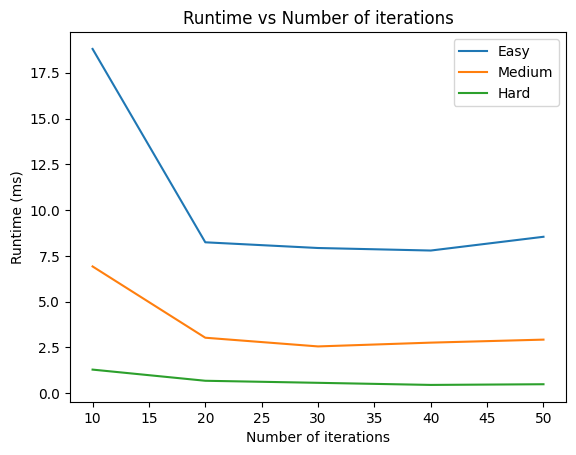

In [68]:
# Plotting
import matplotlib.pyplot as plt

# Plotting the runtime for easy sudokus
x = [10, 20, 30, 40, 50]
y_easy = [(np.mean(easy_times_10_run_1)+np.mean(easy_times_10_run_2)+np.mean(easy_times_10_run_3))/3, (np.mean(easy_times_20_run_1)+np.mean(easy_times_20_run_2)+np.mean(easy_times_20_run_3))/3, (np.mean(easy_times_30_run_1)+np.mean(easy_times_30_run_2)+np.mean(easy_times_30_run_3))/3, (np.mean(easy_times_40_run_1)+np.mean(easy_times_40_run_2)+np.mean(easy_times_40_run_3))/3, (np.mean(easy_times_50_run_1)+np.mean(easy_times_50_run_2)+np.mean(easy_times_50_run_3))/3]
y_medium = [(np.mean(medium_times_10_run_1)+np.mean(medium_times_10_run_2)+np.mean(medium_times_10_run_3))/3, (np.mean(medium_times_20_run_1)+np.mean(medium_times_20_run_2)+np.mean(medium_times_20_run_3))/3, (np.mean(medium_times_30_run_1)+np.mean(medium_times_30_run_2)+np.mean(medium_times_30_run_3))/3, (np.mean(medium_times_40_run_1)+np.mean(medium_times_40_run_2)+np.mean(medium_times_40_run_3))/3, (np.mean(medium_times_50_run_1)+np.mean(medium_times_50_run_2)+np.mean(medium_times_50_run_3))/3]
y_hard =[ (np.mean(hard_times_10_run_1)+np.mean(hard_times_10_run_2)+np.mean(hard_times_10_run_3))/3, (np.mean(hard_times_20_run_1)+np.mean(hard_times_20_run_2)+np.mean(hard_times_20_run_3))/3, (np.mean(hard_times_30_run_1)+np.mean(hard_times_30_run_2)+np.mean(hard_times_30_run_3))/3, (np.mean(hard_times_40_run_1)+np.mean(hard_times_40_run_2)+np.mean(hard_times_40_run_3))/3, (np.mean(hard_times_50_run_1)+np.mean(hard_times_50_run_2)+np.mean(hard_times_50_run_3))/3]
plt.plot(x, y_easy, label="Easy")
plt.plot(x, y_medium, label="Medium")
plt.plot(x, y_hard, label="Hard")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (ms)")
plt.title("Runtime vs Number of iterations")
plt.legend()
plt.show()

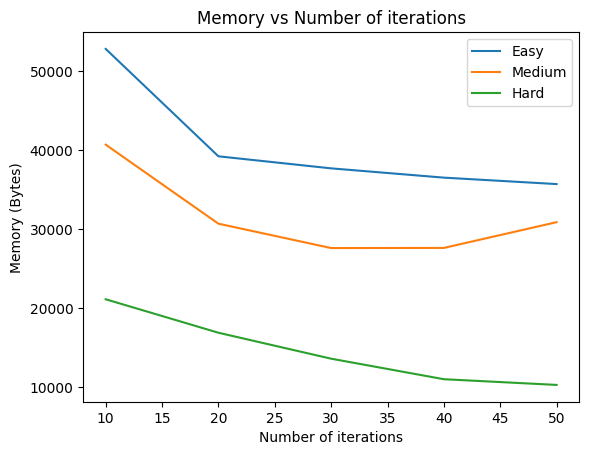

In [69]:
x = [10, 20, 30, 40, 50]
y_easy = [(np.mean(easy_memory_10_run_1)+np.mean(easy_memory_10_run_2)+np.mean(easy_memory_10_run_3))/3, (np.mean(easy_memory_20_run_1)+np.mean(easy_memory_20_run_2)+np.mean(easy_memory_20_run_3))/3, (np.mean(easy_memory_30_run_1)+np.mean(easy_memory_30_run_2)+np.mean(easy_memory_30_run_3))/3, (np.mean(easy_memory_40_run_1)+np.mean(easy_memory_40_run_2)+np.mean(easy_memory_40_run_3))/3, (np.mean(easy_memory_50_run_1)+np.mean(easy_memory_50_run_2)+np.mean(easy_memory_50_run_3))/3]
y_medium = [(np.mean(medium_memory_10_run_1)+np.mean(medium_memory_10_run_2)+np.mean(medium_memory_10_run_3))/3, (np.mean(medium_memory_20_run_1)+np.mean(medium_memory_20_run_2)+np.mean(medium_memory_20_run_3))/3, (np.mean(medium_memory_30_run_1)+np.mean(medium_memory_30_run_2)+np.mean(medium_memory_30_run_3))/3, (np.mean(medium_memory_40_run_1)+np.mean(medium_memory_40_run_2)+np.mean(medium_memory_40_run_3))/3, (np.mean(medium_memory_50_run_1)+np.mean(medium_memory_50_run_2)+np.mean(medium_memory_50_run_3))/3]
y_hard =[ (np.mean(hard_memory_10_run_1)+np.mean(hard_memory_10_run_2)+np.mean(hard_memory_10_run_3))/3, (np.mean(hard_memory_20_run_1)+np.mean(hard_memory_20_run_2)+np.mean(hard_memory_20_run_3))/3, (np.mean(hard_memory_30_run_1)+np.mean(hard_memory_30_run_2)+np.mean(hard_memory_30_run_3))/3, (np.mean(hard_memory_40_run_1)+np.mean(hard_memory_40_run_2)+np.mean(hard_memory_40_run_3))/3, (np.mean(hard_memory_50_run_1)+np.mean(hard_memory_50_run_2)+np.mean(hard_memory_50_run_3))/3]

plt.plot(x, y_easy, label="Easy")
plt.plot(x, y_medium, label="Medium")   
plt.plot(x, y_hard, label="Hard")

plt.xlabel("Number of iterations")
plt.ylabel("Memory (Bytes)")
plt.title("Memory vs Number of iterations")
plt.legend()
plt.show()


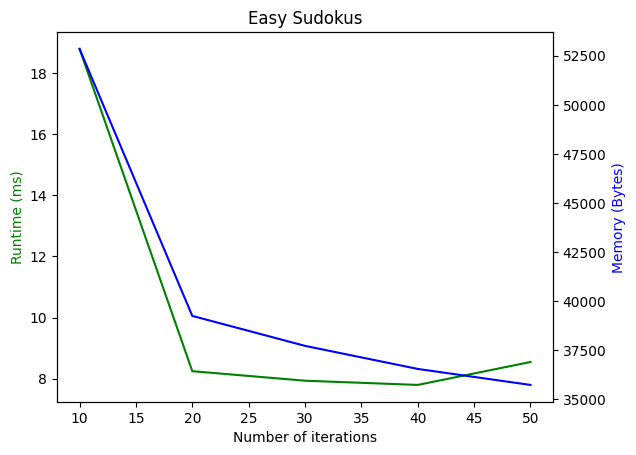

In [72]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
# Plotting Runtime on the left y-axis and Memory on the right y-axis for Easy
x = [10, 20, 30, 40, 50]
y_easy_runtime = [(np.mean(easy_times_10_run_1)+np.mean(easy_times_10_run_2)+np.mean(easy_times_10_run_3))/3, (np.mean(easy_times_20_run_1)+np.mean(easy_times_20_run_2)+np.mean(easy_times_20_run_3))/3, (np.mean(easy_times_30_run_1)+np.mean(easy_times_30_run_2)+np.mean(easy_times_30_run_3))/3, (np.mean(easy_times_40_run_1)+np.mean(easy_times_40_run_2)+np.mean(easy_times_40_run_3))/3, (np.mean(easy_times_50_run_1)+np.mean(easy_times_50_run_2)+np.mean(easy_times_50_run_3))/3]
y_easy_memory = [(np.mean(easy_memory_10_run_1)+np.mean(easy_memory_10_run_2)+np.mean(easy_memory_10_run_3))/3, (np.mean(easy_memory_20_run_1)+np.mean(easy_memory_20_run_2)+np.mean(easy_memory_20_run_3))/3, (np.mean(easy_memory_30_run_1)+np.mean(easy_memory_30_run_2)+np.mean(easy_memory_30_run_3))/3, (np.mean(easy_memory_40_run_1)+np.mean(easy_memory_40_run_2)+np.mean(easy_memory_40_run_3))/3, (np.mean(easy_memory_50_run_1)+np.mean(easy_memory_50_run_2)+np.mean(easy_memory_50_run_3))/3]
ax1.plot(x, y_easy_runtime, 'g-')
ax2.plot(x, y_easy_memory, 'b-')

ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Runtime (ms)', color='g')
ax2.set_ylabel('Memory (Bytes)', color='b')
plt.title("Easy Sudokus")
plt.show()


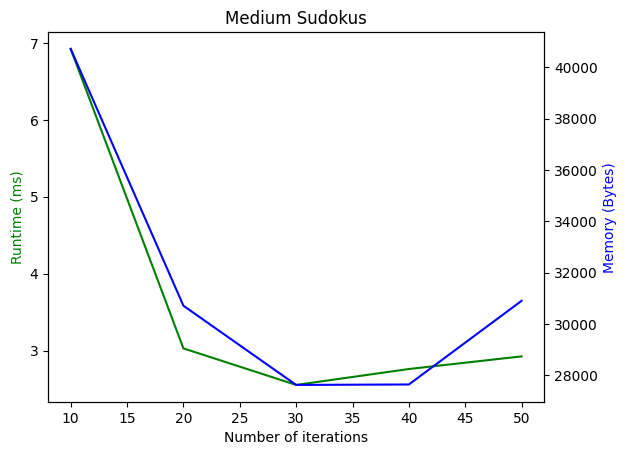

In [73]:
# For Medium Sudokus
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
x = [10, 20, 30, 40, 50]
y_medium_runtime = [(np.mean(medium_times_10_run_1)+np.mean(medium_times_10_run_2)+np.mean(medium_times_10_run_3))/3, (np.mean(medium_times_20_run_1)+np.mean(medium_times_20_run_2)+np.mean(medium_times_20_run_3))/3, (np.mean(medium_times_30_run_1)+np.mean(medium_times_30_run_2)+np.mean(medium_times_30_run_3))/3, (np.mean(medium_times_40_run_1)+np.mean(medium_times_40_run_2)+np.mean(medium_times_40_run_3))/3, (np.mean(medium_times_50_run_1)+np.mean(medium_times_50_run_2)+np.mean(medium_times_50_run_3))/3]
y_medium_memory = [(np.mean(medium_memory_10_run_1)+np.mean(medium_memory_10_run_2)+np.mean(medium_memory_10_run_3))/3, (np.mean(medium_memory_20_run_1)+np.mean(medium_memory_20_run_2)+np.mean(medium_memory_20_run_3))/3, (np.mean(medium_memory_30_run_1)+np.mean(medium_memory_30_run_2)+np.mean(medium_memory_30_run_3))/3, (np.mean(medium_memory_40_run_1)+np.mean(medium_memory_40_run_2)+np.mean(medium_memory_40_run_3))/3, (np.mean(medium_memory_50_run_1)+np.mean(medium_memory_50_run_2)+np.mean(medium_memory_50_run_3))/3]
ax1.plot(x, y_medium_runtime, 'g-')
ax2.plot(x, y_medium_memory, 'b-')

ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Runtime (ms)', color='g')
ax2.set_ylabel('Memory (Bytes)', color='b')
plt.title("Medium Sudokus")
plt.show()


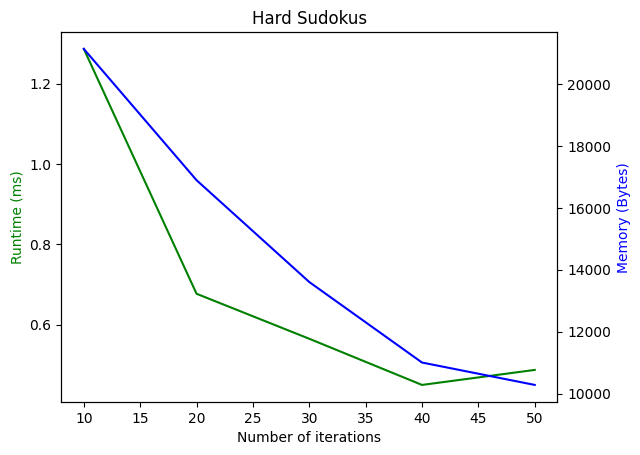

In [74]:
# For Hard Sudokus
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
x = [10, 20, 30, 40, 50]
y_hard_runtime = [(np.mean(hard_times_10_run_1)+np.mean(hard_times_10_run_2)+np.mean(hard_times_10_run_3))/3, (np.mean(hard_times_20_run_1)+np.mean(hard_times_20_run_2)+np.mean(hard_times_20_run_3))/3, (np.mean(hard_times_30_run_1)+np.mean(hard_times_30_run_2)+np.mean(hard_times_30_run_3))/3, (np.mean(hard_times_40_run_1)+np.mean(hard_times_40_run_2)+np.mean(hard_times_40_run_3))/3, (np.mean(hard_times_50_run_1)+np.mean(hard_times_50_run_2)+np.mean(hard_times_50_run_3))/3]
y_hard_memory = [(np.mean(hard_memory_10_run_1)+np.mean(hard_memory_10_run_2)+np.mean(hard_memory_10_run_3))/3, (np.mean(hard_memory_20_run_1)+np.mean(hard_memory_20_run_2)+np.mean(hard_memory_20_run_3))/3, (np.mean(hard_memory_30_run_1)+np.mean(hard_memory_30_run_2)+np.mean(hard_memory_30_run_3))/3, (np.mean(hard_memory_40_run_1)+np.mean(hard_memory_40_run_2)+np.mean(hard_memory_40_run_3))/3, (np.mean(hard_memory_50_run_1)+np.mean(hard_memory_50_run_2)+np.mean(hard_memory_50_run_3))/3]
ax1.plot(x, y_hard_runtime, 'g-')
ax2.plot(x, y_hard_memory, 'b-')

ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Runtime (ms)', color='g')
ax2.set_ylabel('Memory (Bytes)', color='b')
plt.title("Hard Sudokus")
plt.show()
